In [44]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans

In [45]:
dataset = pd.read_csv('data.csv')

In [46]:
dataset.tail(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
237509,West Bengal,2012,Social_Status,Seperated,Female,0-100+,200
237510,West Bengal,2012,Social_Status,Married,Female,0-100+,3927
237511,West Bengal,2012,Social_Status,Divorcee,Female,0-100+,182
237512,West Bengal,2012,Social_Status,Widowed/Widower,Female,0-100+,455
237513,West Bengal,2012,Social_Status,Never Married,Female,0-100+,1513
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189
237518,West Bengal,2012,Social_Status,Never Married,Male,0-100+,2658


In [47]:
dataset.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [48]:
dataset.nunique()

State          38
Year           12
Type_code       5
Type           69
Gender          2
Age_group       6
Total        2180
dtype: int64

In [49]:
dataset['Type'].unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis', 'Diploma',
       'No Education', 'Post Graduate and Above', 'Middle', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary', 'By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)'

In [50]:
dataset['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [51]:
from sklearn.preprocessing import LabelEncoder
LS = LabelEncoder()
data_encoded = dataset.copy()
for labels in ['State', 'Type', 'Type_code', 'Gender', 'Age_group']:
    data_encoded[labels]=LS.fit_transform(data_encoded[labels])
    
data_encoded.tail(10)
    

,State,Year,Type_code,Type,Gender,Age_group,Total
237509,37,2012,4,61,0,0,200
237510,37,2012,4,40,0,0,3927
237511,37,2012,4,25,0,0,182
237512,37,2012,4,68,0,0,455
237513,37,2012,4,43,0,0,1513
237514,37,2012,4,61,1,0,149
237515,37,2012,4,68,1,0,233
237516,37,2012,4,40,1,0,5451
237517,37,2012,4,25,1,0,189
237518,37,2012,4,43,1,0,2658


Visualizing the data

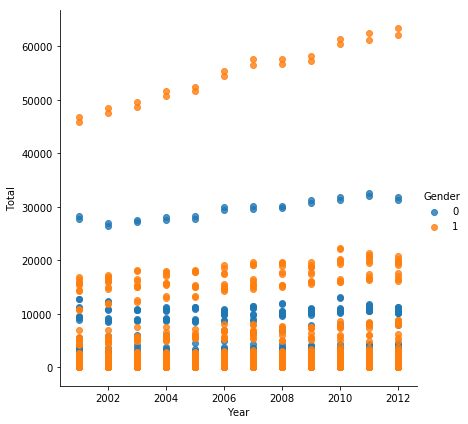

In [55]:
sns.lmplot(x='Year', y = 'Total',hue='Gender', data= data_encoded,scatter = True, fit_reg = False, height = 6)
plt.show()

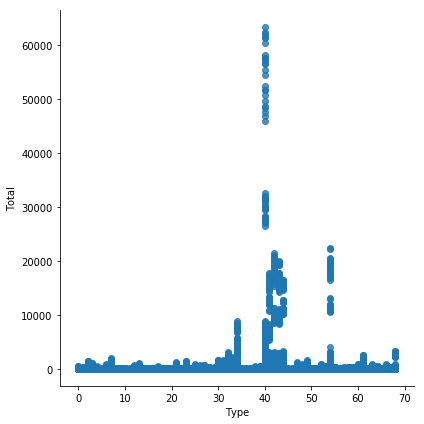

In [56]:
sns.lmplot(x='Type', y = 'Total', data= data_encoded,scatter = True, fit_reg = False, height = 6)
plt.show()

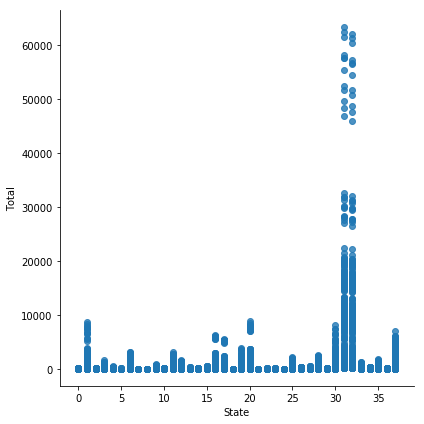

In [108]:
sns.lmplot(x='State', y = 'Total', data= data_encoded,scatter = True, fit_reg = False, height = 6)
plt.show()

Most of the deaths are in states labelled 31,32

Now lets try to predict the Type code. First find the correlation of type_code with other features

In [1]:
#sns.heatmap(data_encoded, annot = True)